# Decision Tree techniques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df['fname'] = df['Name'].apply(lambda x: x.split(',')[1])
df['lname'] = df['Name'].apply(lambda x: x.split(',')[0])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fname,lname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen


In [9]:
df.drop(['Name', 'fname', 'lname'], axis=1, inplace=True)


In [10]:
df.drop(['PassengerId', 'Cabin', 'Parch', 'SibSp', 'Ticket'], axis=1, inplace=True)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [12]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0
Embarked,2


In [13]:
age = df.Age.mean()
age

29.69911764705882

In [14]:
df.Age.fillna(age, inplace=True)
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [15]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0


In [16]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,13.002015,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.910400
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


<Axes: xlabel='Embarked', ylabel='count'>

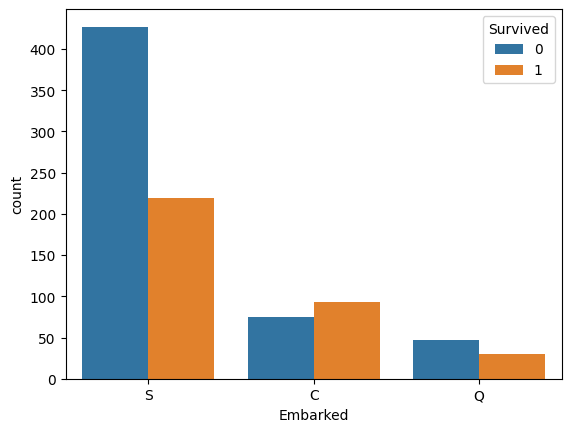

In [17]:
sns.countplot(x='Embarked', hue='Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

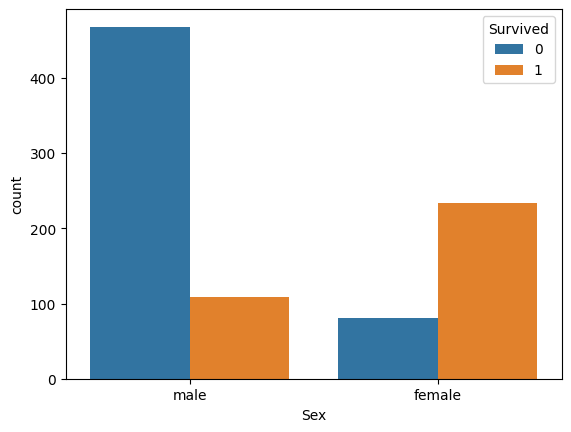

In [18]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


<Axes: xlabel='Pclass', ylabel='count'>

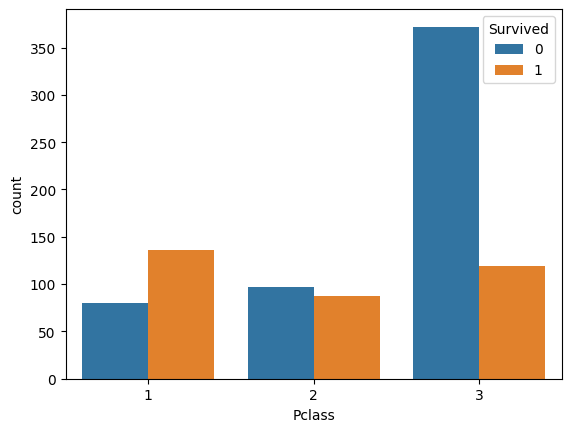

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [22]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})

In [23]:
y = df['Survived']
x = df.drop(['Survived', 'Embarked'], axis=1)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,S
1,1,1,1,38.0,71.2833,C
2,1,3,1,26.0,7.9250,S
3,1,1,1,35.0,53.1000,S
4,0,3,0,35.0,8.0500,S


In [25]:
df['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [27]:
df.shape

(891, 6)

In [28]:
y.shape

(891,)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# randomly divides the data into 20 percent here since test size is mentioned as 0.2
# maintain the order of variables i.e. xtrain, xtest, ytrain, ytest

In [30]:
len(x_train)

712

In [31]:
len(x_test)

179

In [32]:
len(y_test)

179

In [33]:
len(y_train)

712

In [34]:
x_train

,Pclass,Sex,Age,Fare
196,3,0,29.699118,7.7500
44,3,1,19.000000,7.8792
649,3,1,23.000000,7.5500
16,3,0,2.000000,29.1250
508,3,0,28.000000,22.5250
...,...,...,...,...
795,2,0,39.000000,13.0000
737,1,0,35.000000,512.3292
363,3,0,35.000000,7.0500
724,1,0,27.000000,53.1000


In [35]:
from sklearn.tree import DecisionTreeClassifier


In [36]:
model = DecisionTreeClassifier(max_depth=5)

In [37]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
model.score(x_test, y_test)

0.8491620111731844

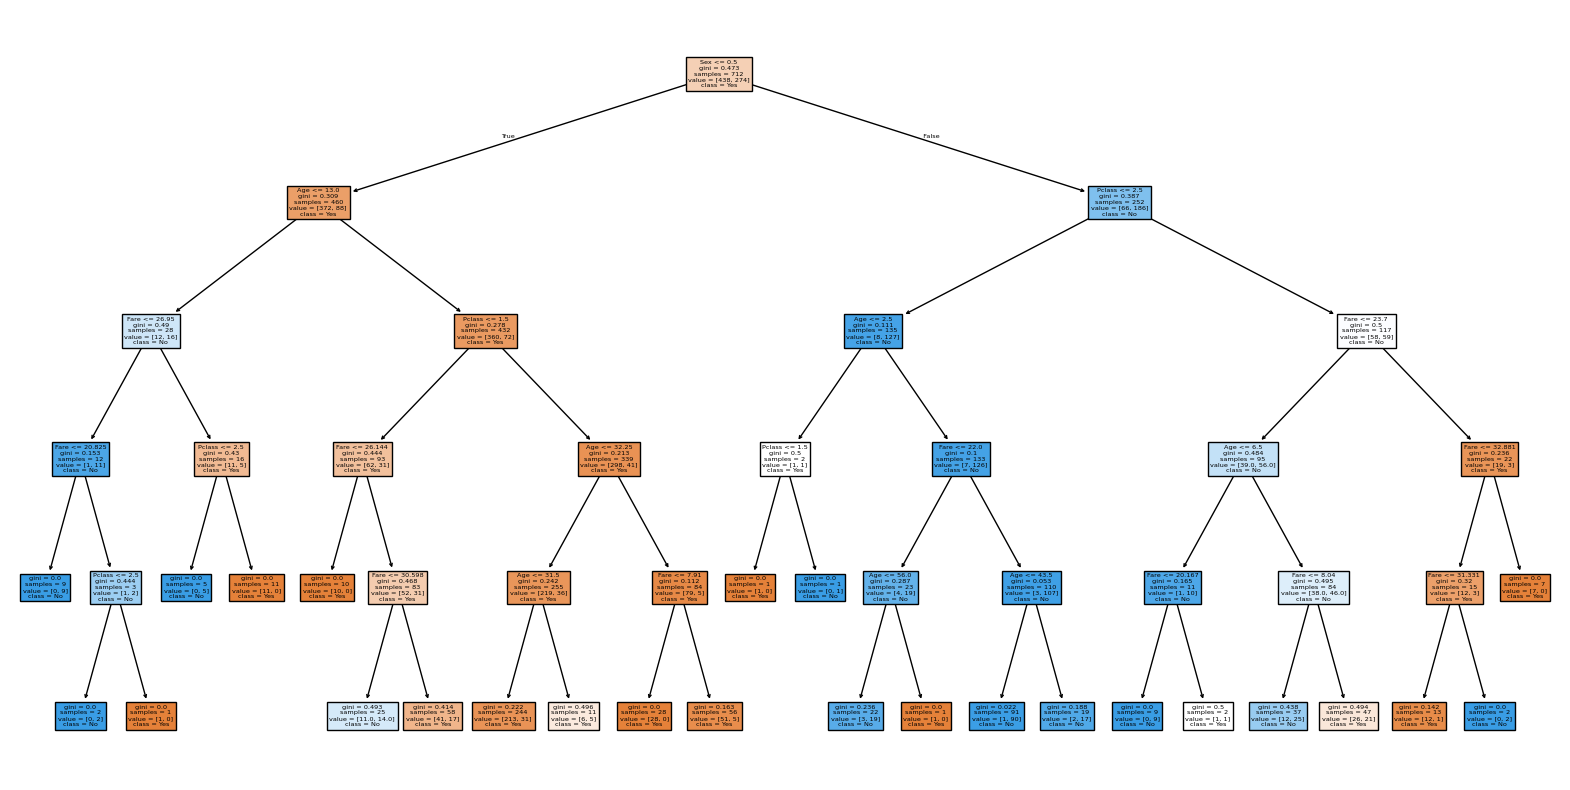

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names = x.columns, filled = True, class_names=['Yes', 'No']) #filled = true is for coloring
plt.show()

In [40]:
model.predict([[1, 2, 0, 71.8]])

array([0])